# Project 2, part c - logistic regression

## Imports

In [1]:
import numpy as np


np.random.seed(12) # for replication purposes

## (Stochastic) Gradient Descent

In [18]:
####
# This function does one sgd epoch.
# The assumptions are that the is some big data set and corresponding cost function floating around
# They should come from the function calling one_epoch_sgd.
#
# N is the number of data points, i.e. the number of times we will update our guess;
# curr_guess is the current guess at a minimum (to be updated);
# learning_rate is the size of the steps we take. 
#
# diff is a function that takes an index i and a vector theta0, 
# it computes the gradient of the cost function at the point theta0,
# when the only data used is the i'th row of the whole data set.

def one_epoch_sgd(N, curr_guess, diff, learning_rate) :
    # make a list of 0,1,2, ... N-1,
    # shuffled around
    shuffled_indiced = np.random.permutation(N)
    for i in shuffled_indiced  :
        curr_guess = curr_guess - learning_rate * diff(i, curr_guess)
    
    return curr_guess

####
# This function uses sgd to find the minimum of a cost function. 
# The assumption is that the cost function breaks into a sum 
# C(theta) = sum_{i=1}^N c(theta; X[i], y[i])
#
# dsummand should compute the gradient of c at a given theta0, 
# if it is also given a row of data and a coresponding y.
#
# We are given the data X, ys;
# the number of epochs and the learning rate. 

def sgd_min(X, ys, dsummand, epochs, learning_rate) :
    N = len(ys) # number of data points 
    p = X.shape[1] # number of columns in X, i.e. number of parameters
    theta = np.random.randn(p,1) # theta is initialized to random values
    # we turn dsummand into a function that takes a row number k, and a theta0,
    # it then evaluteas the dsummand at theta0 when the data is the k'th row of X
    # and the k'th entry of y.
    diff_single_row = (lambda k, theta0 : dsummand(X[[k],:], ys[k], theta0))
    
    # loop over the epochs and for each one do a single epoch step
    for i in range(epochs) :
        theta = one_epoch_sgd(N, theta, diff_single_row, learning_rate)
        
    return theta


####
# xs is a row vector
# y is the "true" values of that row of parameters
# b0 is a column vector
# This function returns the gradient of the function (xs @ beta - y)**2 
# evaluated at b0.
# This is to be used for sgd when the cost function is a least squares one
def diff_single_row_square_sum(xs, y, b0) :
    return 2*(xs @ b0 - y)*(xs.T) 

def sigmoid(x) : 
    return 1/(1+np.exp(-x))

def diff_single_row_cross_entropy(xs, y, b0) :
    return (sigmoid(xs @ b0) - y)*(xs.T)


In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
theta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print("Own inversion")
print(theta_linreg)
sgdreg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("sgdreg from scikit")
print(sgdreg.intercept_, sgdreg.coef_)

print(sgd_min(xb, y, diff_single_row_square_sum, 50, 0.1))


Own inversion
[[4.16186818]
 [2.97789095]]
sgdreg from scikit
[4.15510771] [2.97769893]
[[4.35738349]
 [3.47828023]]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [25]:
class my_logistic_regression :
    
    def __init__(self) :
        self.theta = 0
        self.epochs = 1000
        self.eta = 0.01
        
    def fit(self, X, ys) :
        self.theta = sgd_min(X, ys, diff_single_row_cross_entropy, self.epochs, self.eta)
        
    def soft_predict(self, X) :
        return sigmoid(X @ self.theta)
    
    def predict(self, X) :
        return np.around(sigmoid(X @ self.theta))

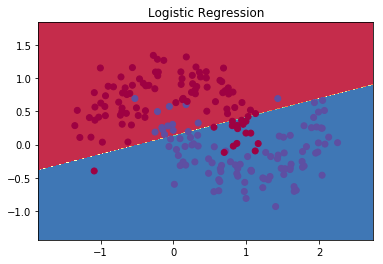

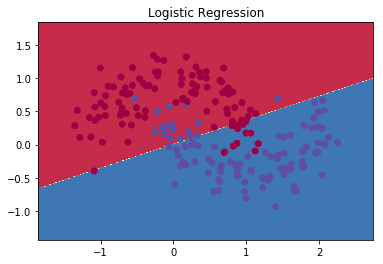

In [26]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y

def visualize(X, y, clf):
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()
    plot_decision_boundary( lambda x: clf.predict(x), X, y)

def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Logistic Regression")
    plt.show()
    
def classify(X, y):
    clf = linear_model.LogisticRegressionCV()
    clf.fit(X, y)
    return clf

X, y = generate_data()
# visualize(X, y)
clf = classify(X, y)
visualize(X, y, clf)

my_logreg = my_logistic_regression()
my_logreg.fit(X,y)

visualize(X,y, my_logreg)
